<a href="https://colab.research.google.com/github/sunnyside94/HRIS/blob/main/Outfitters_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# !pip install pandas
# !pip install pandas-gbq
# !pip install google-cloud-bigquery
# !pip install pandasql
import requests
import pandas as pd
import random
from datetime import timedelta
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Using Mockaroo to generate dummy data
api = "https://api.mockaroo.com/api/67f45720?key=9a09a680&count=1000"

response = requests.get(api)

if response.status_code == 200:
    df = pd.DataFrame(response.json())
    print(df.head())
else:
    print("Error:", response.status_code, response.text)

# Lets give our employees a company email!
df['work_email'] = df['first_name'] + '.' + df['last_name'] + '@outfitters.com'

# Looks like we have end_dates occuring before start_dates, we can fix that and assume that those employees still work at the company
df.loc[df['end_date'] < df['start_date'], 'end_date'] = pd.NaT

# Figure out employees tenure (account for leap years)
df['tenure'] = (pd.to_datetime(df['end_date']) - pd.to_datetime(df['start_date'])).dt.days / 365.25

# Validate that every employee_id is actually unique
df['employee_id'].is_unique

#Create table for badge scans
event_table = pd.DataFrame(columns=['employee_id', 'event_timestamp'])

#Utilizing the start date and end date we will generate a table that has random badge scans
for i in range(len(df)):
  row = df.iloc[i]
  print(i)
  start_date = pd.to_datetime(df['start_date'].iloc[i])
  #Since there are active employees with no end dates yet we will
  #use the current date as a constraint since future badge scans are impossible
  if pd.isna(row['tenure']):
    end_date = pd.Timestamp.today().normalize()
  else:
    end_date = pd.to_datetime(df['end_date'].iloc[i])
  time_between_dates = end_date - start_date
  days_between_dates = time_between_dates.days

  num_iterations = random.randint(0, days_between_dates)
  #True random; utilize below but this will drastically increase runtime
  #For i in range(num_iterations):

  #For simplicity this limits the number of events - A random number between 0 & 10
  #Create a random number to use in For Loops
  rand_int = random.randint(0, 10)
  for i in range(rand_int):
      random_number_of_days = random.randrange(days_between_dates)
      random_date = start_date + timedelta(days=random_number_of_days)
      new_row = pd.DataFrame({'employee_id': [row['employee_id']], 'event_timestamp': [random_date]})
      event_table = pd.concat([event_table, new_row], ignore_index=True)





                  employee_id first_name     last_name  \
0  01JWEYC4KY7XY0J91VWFB7JKSW  Cristobal         Belle   
1  01JWEYC4M3ZCDGSZYCANPXQB8S   Randolph  Ivanshintsev   
2  01JWEYC4M6SHGWBK88GSDSPPTW   Guilbert        Pfaffe   
3  01JWEYC4M8E4FC38P9ADEKP22Y   Leonardo        Cogley   
4  01JWEYC4MASWMKMM8Q5J38QXHQ      Traci     McSperrin   

                        email      ip_address                   name  age  \
0          cbelle0@abc.net.au   109.8.142.130        Cristobal Belle   37   
1  rivanshintsev1@myspace.com  33.226.227.144  Randolph Ivanshintsev   49   
2               gpfaffe2@g.co    111.76.8.154        Guilbert Pfaffe   40   
3            lcogley3@hhs.gov      115.70.9.8        Leonardo Cogley   23   
4      tmcsperrin4@rambler.ru  118.65.205.176        Traci McSperrin   73   

                location  salary  start_date    end_date  department  
0        5017 Pond Plaza  140449  2011-01-04  2002-06-24  Operations  
1  7369 Northridge Point  145803  2023-02-12  

<ipython-input-70-ede8021da971>:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  event_table = pd.concat([event_table, new_row], ignore_index=True)


57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317

In [83]:
df

,employee_id,first_name,last_name,email,ip_address,name,age,location,salary,start_date,end_date,department,work_email,tenure
0,01JWEYC4KY7XY0J91VWFB7JKSW,Cristobal,Belle,cbelle0@abc.net.au,109.8.142.130,Cristobal Belle,37,5017 Pond Plaza,140449,2011-01-04,NaT,Operations,Cristobal.Belle@outfitters.com,NaN
1,01JWEYC4M3ZCDGSZYCANPXQB8S,Randolph,Ivanshintsev,rivanshintsev1@myspace.com,33.226.227.144,Randolph Ivanshintsev,49,7369 Northridge Point,145803,2023-02-12,NaT,HR,Randolph.Ivanshintsev@outfitters.com,NaN
2,01JWEYC4M6SHGWBK88GSDSPPTW,Guilbert,Pfaffe,gpfaffe2@g.co,111.76.8.154,Guilbert Pfaffe,40,189 Eagan Way,217238,2007-03-28,NaT,HR,Guilbert.Pfaffe@outfitters.com,NaN
3,01JWEYC4M8E4FC38P9ADEKP22Y,Leonardo,Cogley,lcogley3@hhs.gov,115.70.9.8,Leonardo Cogley,23,31175 Fisk Court,123770,2003-11-08,2012-09-24,Finance,Leonardo.Cogley@outfitters.com,8.878850
4,01JWEYC4MASWMKMM8Q5J38QXHQ,Traci,McSperrin,tmcsperrin4@rambler.ru,118.65.205.176,Traci McSperrin,73,6 Namekagon Plaza,247646,2013-03-07,2017-10-29,Finance,Traci.McSperrin@outfitters.com,4.646133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,01JWEYC5R1W842F4DP5NCP4VJ2,Andre,Possek,apossekrn@php.net,6.50.84.138,Andre Possek,58,306 Claremont Alley,106624,2016-08-28,2018-10-31,Operations,Andre.Possek@outfitters.com,2.173854
996,01JWEYC5R2CHB5GNVF0RG1KQZZ,Christel,Mingame,cmingamero@smh.com.au,175.175.169.99,Christel Mingame,51,24947 Hansons Crossing,100453,2006-08-28,2023-10-15,Merchandise,Christel.Mingame@outfitters.com,17.130732
997,01JWEYC5R3ZK58S9PHFQBK5M8R,Marney,Gelland,mgellandrp@ustream.tv,124.148.18.8,Marney Gelland,81,14341 Montana Court,179592,2006-11-12,NaT,Marketing,Marney.Gelland@outfitters.com,NaN
998,01JWEYC5R40VANM47711STNN4B,Imelda,Filon,ifilonrq@dagondesign.com,181.183.223.255,Imelda Filon,32,70179 Hallows Point,248004,2009-02-17,2017-01-21,Product,Imelda.Filon@outfitters.com,7.926078


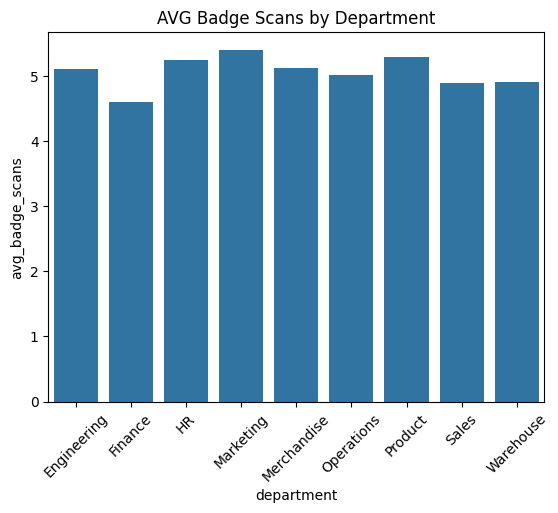

The department with the highest average badge scans is Marketing with an average of 5.4 badge scans.
The department with the lowest average badge scans is Finance with an average of 4.601851851851852 badge scans


In [82]:
#Utilize SQL to pull insights
query = "SELECT *, AVG(badge_scans) OVER (PARTITION BY department) as avg_badge_scans FROM (SELECT df.employee_id, department, COUNT(DISTINCT event_timestamp) as badge_scans FROM df LEFT JOIN event_table ON df.employee_id = event_table.employee_id GROUP BY df.employee_id, df.department)"
base = ps.sqldf(query, locals())
data = base

# Create bar chart
sns.barplot(data=data, x='department', y='avg_badge_scans')

# Show chart
plt.title('AVG Badge Scans by Department')
plt.xticks(rotation=45)
plt.show()

#Department with the highets average badge scans
top_department = data.loc[data['avg_badge_scans'].idxmax()]

#Department with the highets average badge scans
low_department = data.loc[data['avg_badge_scans'].idxmin()]

print(f"The department with the highest average badge scans is {top_department['department']} with an average of {top_department['avg_badge_scans']} badge scans.")
print(f"The department with the lowest average badge scans is {low_department['department']} with an average of {low_department['avg_badge_scans']} badge scans")

In [106]:
raw_data = "SELECT df.*, event_timestamp FROM df LEFT JOIN event_table ON event_table.employee_id = df.employee_id"
data_feed = ps.sqldf(raw_data, locals())


data_feed


,employee_id,first_name,last_name,email,ip_address,name,age,location,salary,start_date,end_date,department,work_email,tenure,event_timestamp
0,01JWEYC4KY7XY0J91VWFB7JKSW,Cristobal,Belle,cbelle0@abc.net.au,109.8.142.130,Cristobal Belle,37,5017 Pond Plaza,140449,2011-01-04,None,Operations,Cristobal.Belle@outfitters.com,NaN,2019-07-20 00:00:00.000000
1,01JWEYC4M3ZCDGSZYCANPXQB8S,Randolph,Ivanshintsev,rivanshintsev1@myspace.com,33.226.227.144,Randolph Ivanshintsev,49,7369 Northridge Point,145803,2023-02-12,None,HR,Randolph.Ivanshintsev@outfitters.com,NaN,2023-08-17 00:00:00.000000
2,01JWEYC4M3ZCDGSZYCANPXQB8S,Randolph,Ivanshintsev,rivanshintsev1@myspace.com,33.226.227.144,Randolph Ivanshintsev,49,7369 Northridge Point,145803,2023-02-12,None,HR,Randolph.Ivanshintsev@outfitters.com,NaN,2023-11-20 00:00:00.000000
3,01JWEYC4M3ZCDGSZYCANPXQB8S,Randolph,Ivanshintsev,rivanshintsev1@myspace.com,33.226.227.144,Randolph Ivanshintsev,49,7369 Northridge Point,145803,2023-02-12,None,HR,Randolph.Ivanshintsev@outfitters.com,NaN,2023-12-20 00:00:00.000000
4,01JWEYC4M3ZCDGSZYCANPXQB8S,Randolph,Ivanshintsev,rivanshintsev1@myspace.com,33.226.227.144,Randolph Ivanshintsev,49,7369 Northridge Point,145803,2023-02-12,None,HR,Randolph.Ivanshintsev@outfitters.com,NaN,2024-08-15 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,01JWEYC5R40VANM47711STNN4B,Imelda,Filon,ifilonrq@dagondesign.com,181.183.223.255,Imelda Filon,32,70179 Hallows Point,248004,2009-02-17,2017-01-21,Product,Imelda.Filon@outfitters.com,7.926078,2013-12-23 00:00:00.000000
5165,01JWEYC5R40VANM47711STNN4B,Imelda,Filon,ifilonrq@dagondesign.com,181.183.223.255,Imelda Filon,32,70179 Hallows Point,248004,2009-02-17,2017-01-21,Product,Imelda.Filon@outfitters.com,7.926078,2015-01-25 00:00:00.000000
5166,01JWEYC5R40VANM47711STNN4B,Imelda,Filon,ifilonrq@dagondesign.com,181.183.223.255,Imelda Filon,32,70179 Hallows Point,248004,2009-02-17,2017-01-21,Product,Imelda.Filon@outfitters.com,7.926078,2016-10-04 00:00:00.000000
5167,01JWEYC5R6EHE3D6D10S6GAF72,Kirk,Leneve,kleneverr@bbc.co.uk,76.142.180.113,Kirk Leneve,64,83 David Park,173949,2024-04-25,None,Engineering,Kirk.Leneve@outfitters.com,NaN,2024-11-21 00:00:00.000000


In [108]:
from google.colab import auth
auth.authenticate_user()

In [116]:
# 1. Authenticate with Google Cloud
from google.colab import auth
auth.authenticate_user()

# 2. Define Google Cloud Project ID
project_id = 'api-project-360017'

# 3. Define your BigQuery Dataset and Table names
dataset_id = 'employee_data_set'
table_id = 'employee_badge_scans'

# 4. Upload the DataFrame to BigQuery
try:
    data_feed.to_gbq(
        destination_table=f'{dataset_id}.{table_id}',
        project_id=project_id,
        if_exists='replace',
        location='US'
    )
    print(f"\nSuccessfully uploaded 'data_feed' to BigQuery table: {project_id}.{dataset_id}.{table_id}")
except Exception as e:
    print(f"\nError uploading to BigQuery: {e}")
    print("Please ensure:")
    print(f"1. You have replaced 'your-gcp-project-id' with your actual Project ID.")
    print(f"2. Your Google account has the 'BigQuery Data Editor' role (or similar) on your project.")
    print(f"3. You have enabled the BigQuery API for your project in the Google Cloud Console.")


# 7. Verify the upload by querying the data from BigQuery
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

# Construct a reference to the table
table_ref = client.dataset(dataset_id).table(table_id)

# Select all data from the newly created table
query_string = f"SELECT * FROM `{project_id}.{dataset_id}.{table_id}` LIMIT 5"

try:
    query_job = client.query(query_string)
    # Convert the query results to a Pandas DataFrame
    bigquery_df = query_job.to_dataframe()

    print(bigquery_df.head())
except Exception as e:
    print(f"\nError querying data from BigQuery: {e}")




<ipython-input-116-91879ae8e24b>:14: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  data_feed.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]



Successfully uploaded 'data_feed' to BigQuery table: api-project-360017.employee_data_set.employee_badge_scans
                  employee_id first_name     last_name  \
0  01JWEYC4KY7XY0J91VWFB7JKSW  Cristobal         Belle   
1  01JWEYC4M3ZCDGSZYCANPXQB8S   Randolph  Ivanshintsev   
2  01JWEYC4M3ZCDGSZYCANPXQB8S   Randolph  Ivanshintsev   
3  01JWEYC4M3ZCDGSZYCANPXQB8S   Randolph  Ivanshintsev   
4  01JWEYC4M3ZCDGSZYCANPXQB8S   Randolph  Ivanshintsev   

                        email      ip_address                   name  age  \
0          cbelle0@abc.net.au   109.8.142.130        Cristobal Belle   37   
1  rivanshintsev1@myspace.com  33.226.227.144  Randolph Ivanshintsev   49   
2  rivanshintsev1@myspace.com  33.226.227.144  Randolph Ivanshintsev   49   
3  rivanshintsev1@myspace.com  33.226.227.144  Randolph Ivanshintsev   49   
4  rivanshintsev1@myspace.com  33.226.227.144  Randolph Ivanshintsev   49   

                location  salary  start_date end_date  department  \
0      